In [142]:
import pandas as pd 
data = pd.read_csv('udemy_courses.csv')

In [143]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3683 non-null int64
course_title           3683 non-null object
url                    3683 non-null object
is_paid                3683 non-null object
price                  3683 non-null object
num_subscribers        3683 non-null int64
num_reviews            3683 non-null int64
num_lectures           3683 non-null int64
level                  3683 non-null object
content_duration       3683 non-null object
published_timestamp    3683 non-null object
subject                3683 non-null object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3683.0,676454.649199,343721.669110,8324.0,407727.0,688244.0,961729.0,1282064.0
num_subscribers,3683.0,3193.371165,9498.231406,0.0,110.0,911.0,2537.5,268923.0
num_reviews,3683.0,156.448004,935.078241,0.0,4.0,18.0,67.0,27445.0
num_lectures,3683.0,40.062178,50.366788,0.0,15.0,25.0,45.0,779.0


# Subject wise analysis

In [146]:
def count_rows(dt):
    return len(dt)
subjects  = data.groupby('subject').apply(count_rows)

In [147]:
subjects

subject
Business Finance       1199
Graphic Design          603
Musical Instruments     681
Web Development        1200
dtype: int64

# changing the dtypes

In [148]:
data.price = data.price.replace(['Free',"TRUE"], 0)

In [149]:
data.price = pd.to_numeric(data.price)

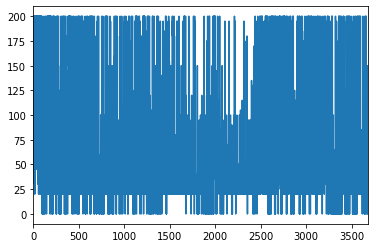

In [150]:

data.price.plot()

In [151]:
data.price.max()

200

In [152]:
data.is_paid.unique()
#data.is_paid = data.is_paid.astype('Category')

array(['True', 'False', 'FALSE', 'TRUE',
       'https://www.udemy.com/learnguitartoworship/'], dtype=object)

In [153]:
data.is_paid = data.is_paid.replace('True', 'TRUE')
data.is_paid = data.is_paid.replace('False', 'FALSE')

In [154]:
data.is_paid= data.is_paid.astype('category')
data.level= data.level.astype('category')
data.subject= data.subject.astype('category')

In [155]:
df = pd.DataFrame(data.content_duration.str.split(' ').tolist(), columns=['time', 'hr'])

In [156]:
data['time_in_num(hrs)'] = df["time"]

In [157]:
del data['content_duration']

In [158]:
data['time_in_num(hrs)']= data['time_in_num(hrs)'].replace('Beginner', 0)
data['time_in_num(hrs)'] = pd.to_numeric(data['time_in_num(hrs)'])

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3683 non-null int64
course_title           3683 non-null object
url                    3683 non-null object
is_paid                3683 non-null category
price                  3683 non-null int64
num_subscribers        3683 non-null int64
num_reviews            3683 non-null int64
num_lectures           3683 non-null int64
level                  3683 non-null category
published_timestamp    3683 non-null object
subject                3683 non-null category
time_in_num(hrs)       3683 non-null float64
dtypes: category(3), float64(1), int64(5), object(3)
memory usage: 270.4+ KB


## Date/Time 

In [160]:
df = pd.DataFrame(data.published_timestamp.str.split('T').tolist(), columns=['date', 'time'])

In [161]:
df.time = df.time.str[0:8]

In [162]:
import datetime
df['Date/Time'] = pd.to_datetime((df['date']+' '+df['time']))


In [163]:
data['published_timestamp'] = df['Date/Time']

In [164]:
data.is_paid = data.is_paid.replace('https://www.udemy.com/learnguitartoworship/', 'FALSE')

In [169]:
data.is_paid.unique()

[TRUE, FALSE]
Categories (2, object): [TRUE, FALSE]

# Importing Seaborn, Matplotlib for Data Visualization

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

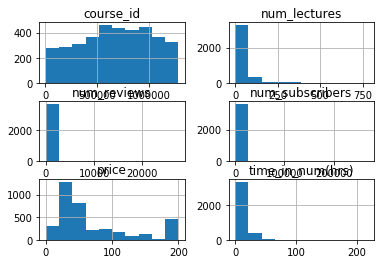

In [186]:
data.hist()
plt.show()

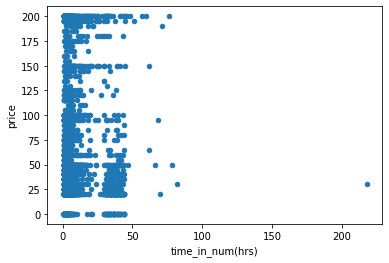

In [167]:
data.plot(kind="scatter", x='time_in_num(hrs)', y='price')


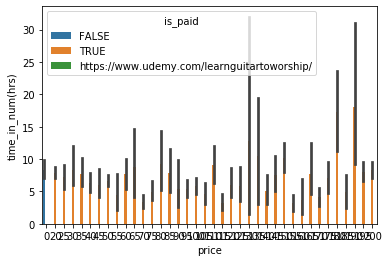

In [168]:
sns.barplot(x ='price', y='time_in_num(hrs)', hue='is_paid', data= data)

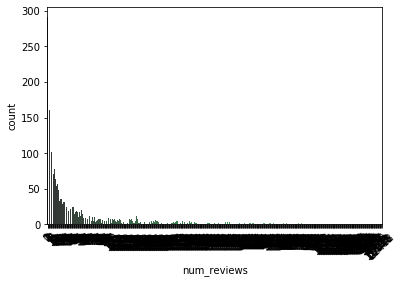

In [175]:
sns.countplot(x='num_reviews', data=data, palette="Greens_d")
plt.xticks(rotation=45)
plt.show()

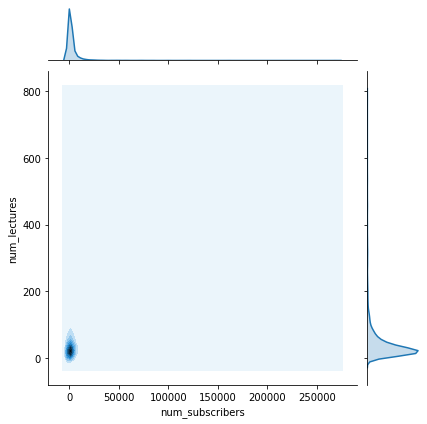

In [176]:
sns.jointplot("num_subscribers", "num_lectures",data= data, kind='kde')

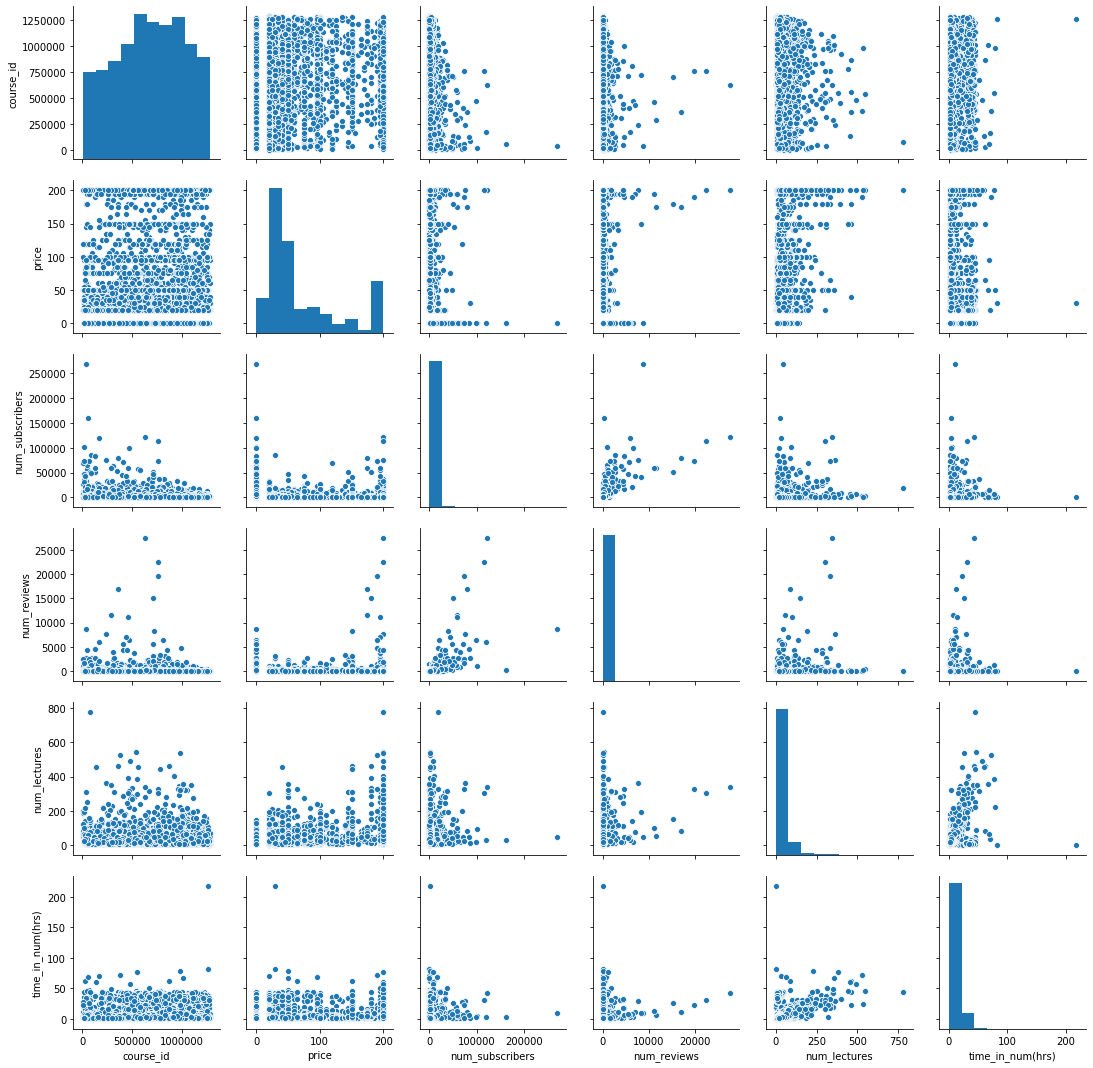

In [177]:
sns.pairplot(data)

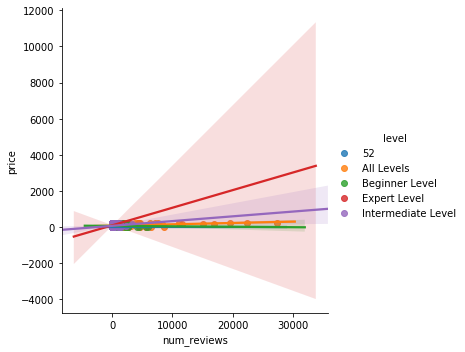

In [183]:
sns.lmplot(x='num_reviews', y='price', hue='level',data=data)